# Upgrad Lending Club Case Study

## Case Study Partners:
1. Sumitkumar Nayak
2. Karthik Varma

## Problem Statement

### Introduction
<p>Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.</p>

### Business Understanding
<p>You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:</p>

    1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

<p>The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.</p>

<p>In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.</p>

<img src="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png">

<p>When a person applies for a loan, there are two types of decisions that could be taken by the company:</p>

    1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
        1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
        2. Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
        3.Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

    2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

### Business Objectives

<p>This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.</p>

<p>Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.</p>

<p>If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.</p>

<p>In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.</p>

<p>To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).</p>

## Step 1: We have to import the Python Packages

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', None)
# pd.set_option('max_rows', None)

## Step 2: Import the CSV of loan.csv and creating Data Set and Data understanding

In [43]:
loan_data = pd.read_csv("loan.csv",dtype='unicode', error_bad_lines=False)
#  dtype='unicode' => It will bascially encode all the data in unicode format. Also when we did not use dtype it was giving Datatype warning
# 4.55

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
loan_data.head()
#This function returns the first n rows for the object based on position. 
#It is useful for quickly testing if your object has the right type of data in it.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [45]:
loan_data.describe()
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
# It will take all the Numerical values

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,US Army,10+ years,RENT,60000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,0,0,Nov-98,0,0,0,7,0,0,0%,16,f,0,0,11196.56943,0,10000,0,0,0,0,May-16,0,Jun-16,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,134,8879,18899,1505,16921,2260,32950,39717,1,210,18641,2184,597,7099,183,35405,370,19300,443,670,4018,37601,994,977,1471,39717,38577,38577,26,165,2293,71,37671,35499,35935,1256,74,1125,10308,39661,NaN,39717,39717,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39661,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


In [46]:
loan_data.shape[0]
#Return a tuple representing the dimensionality of the DataFrame.

39717

In [47]:
loan_data.info()
#Print a concise summary of a DataFrame.
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


## Step 3: Data Cleaning and Manipulation

### 3.1 In this Step we will remove the NA and unwanted columns

In [48]:
#Find number of Missing Columns, Columns with having 80% of the NA values


# We have taken 0.8 value as we want to remove the NA values of rows having NA values approx to 80%
thresh_limit = len(loan_data) * 0.8

removed_thresh_data = loan_data.dropna(thresh=thresh_limit, axis=1)

#This are the unwamted columns which will not be used for analysis
removed_thresh_data = removed_thresh_data.drop([ 'member_id', 'id', 'url','delinq_amnt', 'acc_now_delinq', 
                                                'application_type','policy_code', 'pymnt_plan', 
                                                'initial_list_status', 'chargeoff_within_12_mths', 'tax_liens', 
                                                'collections_12_mths_ex_med','emp_title','delinq_2yrs'], axis =1)

removed_thresh_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,2500,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1,Apr-99,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
2,2400,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0
3,10000,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20,Feb-96,1,10,0,5598,21%,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0
4,3000,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,May-16,0


### 3.2 We will now format the data in the columns which will be used for analysis.

In [49]:
# We will now format the employement length column and convert it into Interger value. We will remove the special charcaters and string from the rows data

#In the emp_length, int_rate, revol_util column we have many NA values , we will convert the NA to 0
removed_thresh_data['emp_length'].fillna('0', inplace = True)
removed_thresh_data['int_rate'].fillna('0', inplace = True)
removed_thresh_data['revol_util'].fillna('0', inplace = True)

#Now we will remove the string characters from the emp_length, int_rate, revol_util column and convert the datatype to Integer
removed_thresh_data['emp_length']=removed_thresh_data['emp_length'].str.extract('(\d+)').astype(int)
removed_thresh_data['int_rate']=removed_thresh_data['int_rate'].str.extract('(\d+)').astype(int)
removed_thresh_data['revol_util']=removed_thresh_data['revol_util'].str.extract('(\d+)').astype(int)
removed_thresh_data['term']=removed_thresh_data['term'].str.extract('(\d+)').astype(int)


format_int_float_columns= ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv',
                            'installment','annual_inc','dti','emp_length','total_pymnt','total_pymnt_inv']
removed_thresh_data[format_int_float_columns] = removed_thresh_data[format_int_float_columns].apply(pd.to_numeric)
removed_thresh_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,"4,975.00",36,10,162.87,B,B2,10,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,Jan-85,1,3,0,13648,83,9,0,0,"5,863.16","5,833.84",5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,2500,2500,"2,500.00",60,15,59.83,C,C4,1,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,Apr-99,5,3,0,1687,9,4,0,0,"1,008.71","1,008.71",456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0
2,2400,2400,"2,400.00",36,15,84.33,C,C5,10,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,Nov-01,2,2,0,2956,98,10,0,0,"3,005.67","3,005.67",2400,605.67,0,0,0,Jun-14,649.91,May-16,0
3,10000,10000,"10,000.00",36,13,339.31,C,C1,10,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,Feb-96,1,10,0,5598,21,37,0,0,"12,231.89","12,231.89",10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0
4,3000,3000,"3,000.00",60,12,67.79,B,B5,1,RENT,"80,000.00",Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,Jan-96,0,15,0,27783,53,38,524.06,524.06,"3,513.33","3,513.33",2475.94,1037.39,0,0,0,May-16,67.79,May-16,0


In [106]:
# Convert the Date column to Python DateTime object

# For 'issue_d' column
removed_thresh_data['issue_d'] = pd.to_datetime(removed_thresh_data.issue_d, format='%b-%y')
removed_thresh_data['loan_issue_d_year']=removed_thresh_data['issue_d'].dt.year
removed_thresh_data['loan_issue_d_month']=removed_thresh_data['issue_d'].dt.month_name()

# For 'last_pymnt_d' column
removed_thresh_data['last_pymnt_d'] = pd.to_datetime(removed_thresh_data.last_pymnt_d, format='%b-%y')
removed_thresh_data['last_credit_pull_d'] = pd.to_datetime(removed_thresh_data.last_credit_pull_d, format='%b-%y')


In [108]:
 removed_thresh_data.head()
removed_thresh_data.isnull().sum()


In [109]:
pd.set_option('max_columns', None)
removed_thresh_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_d_year,loan_issue_d_month,loan_income_percentage,investor_profit_percentage
0,5000,5000,"4,975.00",36,10,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,Jan-85,1,3,0,13648,83,9,0,0,"5,863.16","5,833.84",5000,863.16,0,0,0,2015-01-01,171.62,2016-05-01,0,2011,December,20.83,17.26
1,2500,2500,"2,500.00",60,15,59.83,C,C4,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,Apr-99,5,3,0,1687,9,4,0,0,"1,008.71","1,008.71",456.46,435.17,0,117.08,1.11,2013-04-01,119.66,2013-09-01,0,2011,December,8.33,-59.65
3,10000,10000,"10,000.00",36,13,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,Feb-96,1,10,0,5598,21,37,0,0,"12,231.89","12,231.89",10000,2214.92,16.97,0,0,2015-01-01,357.48,2016-04-01,0,2011,December,20.33,22.32
4,3000,3000,"3,000.00",60,12,67.79,B,B5,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,972xx,OR,17.94,Jan-96,0,15,0,27783,53,38,524.06,524.06,"3,513.33","3,513.33",2475.94,1037.39,0,0,0,2016-05-01,67.79,2016-05-01,0,2011,December,3.75,17.11
5,5000,5000,"5,000.00",36,7,156.46,A,A4,3,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,Nov-04,3,9,0,7963,28,12,0,0,"5,632.21","5,632.21",5000,632.21,0,0,0,2015-01-01,161.03,2016-01-01,0,2011,December,13.89,12.64


In [53]:
#Dropping title column as it has many duplicate category names indicating same category(Ex personel,Personal)
removed_thresh_data.drop('title',inplace=True,axis=1)


In [54]:
removed_thresh_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_d_year,loan_issue_d_month,last_pymnt_d_year,last_pymnt_d_month
0,5000,5000,"4,975.00",36,10,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,Jan-85,1,3,0,13648,83,9,0,0,"5,863.16","5,833.84",5000,863.16,0,0,0,2015-01-01,171.62,2016-05-01,0,2011,December,"2,015.00",January
1,2500,2500,"2,500.00",60,15,59.83,C,C4,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,Apr-99,5,3,0,1687,9,4,0,0,"1,008.71","1,008.71",456.46,435.17,0,117.08,1.11,2013-04-01,119.66,2013-09-01,0,2011,December,"2,013.00",April
2,2400,2400,"2,400.00",36,15,84.33,C,C5,10,RENT,"12,252.00",Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,Nov-01,2,2,0,2956,98,10,0,0,"3,005.67","3,005.67",2400,605.67,0,0,0,2014-06-01,649.91,2016-05-01,0,2011,December,"2,014.00",June
3,10000,10000,"10,000.00",36,13,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,Feb-96,1,10,0,5598,21,37,0,0,"12,231.89","12,231.89",10000,2214.92,16.97,0,0,2015-01-01,357.48,2016-04-01,0,2011,December,"2,015.00",January
4,3000,3000,"3,000.00",60,12,67.79,B,B5,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,972xx,OR,17.94,Jan-96,0,15,0,27783,53,38,524.06,524.06,"3,513.33","3,513.33",2475.94,1037.39,0,0,0,2016-05-01,67.79,2016-05-01,0,2011,December,"2,016.00",May


In [55]:
removed_thresh_data['loan_income_percentage']=removed_thresh_data['loan_amnt']/removed_thresh_data['annual_inc']*100

In [111]:
removed_thresh_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_issue_d_year,loan_issue_d_month,loan_income_percentage,investor_profit_percentage
0,5000,5000,"4,975.00",36,10,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,Jan-85,1,3,0,13648,83,9,0,0,"5,863.16","5,833.84",5000,863.16,0,0,0,2015-01-01,171.62,2016-05-01,0,2011,December,20.83,17.26
1,2500,2500,"2,500.00",60,15,59.83,C,C4,1,RENT,"30,000.00",Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,Apr-99,5,3,0,1687,9,4,0,0,"1,008.71","1,008.71",456.46,435.17,0,117.08,1.11,2013-04-01,119.66,2013-09-01,0,2011,December,8.33,-59.65
3,10000,10000,"10,000.00",36,13,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,Feb-96,1,10,0,5598,21,37,0,0,"12,231.89","12,231.89",10000,2214.92,16.97,0,0,2015-01-01,357.48,2016-04-01,0,2011,December,20.33,22.32
4,3000,3000,"3,000.00",60,12,67.79,B,B5,1,RENT,"80,000.00",Source Verified,2011-12-01,Current,other,972xx,OR,17.94,Jan-96,0,15,0,27783,53,38,524.06,524.06,"3,513.33","3,513.33",2475.94,1037.39,0,0,0,2016-05-01,67.79,2016-05-01,0,2011,December,3.75,17.11
5,5000,5000,"5,000.00",36,7,156.46,A,A4,3,RENT,"36,000.00",Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,Nov-04,3,9,0,7963,28,12,0,0,"5,632.21","5,632.21",5000,632.21,0,0,0,2015-01-01,161.03,2016-01-01,0,2011,December,13.89,12.64


In [67]:
#Finding out the investor profit percentage
removed_thresh_data['investor_profit_percentage']=((removed_thresh_data['total_pymnt_inv']-removed_thresh_data['funded_amnt_inv'])/removed_thresh_data['funded_amnt_inv'])*100


In [98]:
income_outliers_max = removed_thresh_data["annual_inc"].quantile(0.99)
income_outliers_min = removed_thresh_data["annual_inc"].quantile(0.01)
removed_thresh_data.drop(removed_thresh_data[~((removed_thresh_data["annual_inc"] < income_outliers_max) & (removed_thresh_data["annual_inc"] > income_outliers_min))].index, inplace = True)

## Univariate Analysis

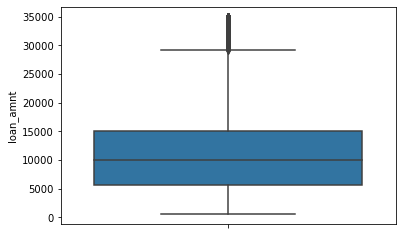

In [114]:
sns.boxplot(y=removed_thresh_data['loan_amnt'])
plt.show()

Note: Median Loan amount is 10000 and highest loan is just 3 times of median value(This could be important in scenario where large loan borrowers are defaulting Ex:Vijay malya)

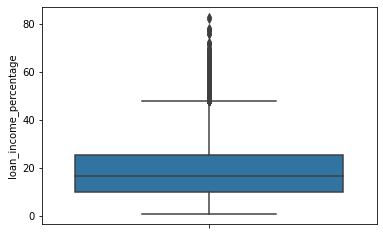

In [113]:
sns.boxplot(y=removed_thresh_data['loan_income_percentage'])
plt.show()

In [110]:
removed_thresh_data.shape

(38897, 42)